In [1]:
import pandas as pd
#Importing all modules here
import os
import sys
import re
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn import metrics
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
Prescriber=pd.read_csv(r"P:\data_science\github\Medication_prediction_Data\SortedData\Prescriber-info-count.csv")

In [3]:
Prescriber =Prescriber.drop('Unnamed: 0',1)

In [4]:
Prescriber

,npi,Gender,State,Credentials,Specialty,ACARBOSE,ACETAZOLAMIDE,ADEMPAS,AGGRENOX,ALREX,...,ZEMAIRA,ZENPEP,ZEPATIER,ZIOPTAN,ZIRGAN,ZORTRESS,ZORVOLEX,ZOSTAVAX,ZUBSOLV,Opioid.Prescriber
0,1003000126,M,MD,M.D.,Internal Medicine,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1003000142,M,OH,M.D.,Anesthesiology,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1003000167,M,NV,DDS,Dentist,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1003000282,F,TN,FNP,Nurse Practitioner,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1003000407,M,PA,D.O.,Family Practice,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4534,1003814245,M,CT,M.D.,Ophthalmology,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4535,1003814351,F,NY,M.D.,Family Practice,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4536,1003814393,M,CA,DDS,Dentist,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4537,1003814401,M,MD,M.D.,Psychiatry & Neurology,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Try Model

In [13]:
dentists = Prescriber[Prescriber['Specialty'] == 'Dentist']

dentists['Gender'] = pd.get_dummies(dentists['Gender'])

target = 'Opioid.Prescriber'
X = dentists.drop(['npi', 'Specialty', 'Credentials', 'State', target], 1)
y = dentists[target]
(X.shape, y.shape)

C:\ProgramData\Miniconda3\envs\machine-learning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


((20314, 301), (20314,))

In [28]:
X

,Gender,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,ALENDRONATE.SODIUM,ALLOPURINOL,ALPHAGAN.P,ALPRAZOLAM,AMIODARONE.HCL,AMITIZA,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VICTOZA.3.PAK,VOLTAREN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,1,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181804,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181807,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181809,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
181813,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
from sklearn.model_selection import train_test_split
alg = xgb.XGBClassifier(
        learning_rate =0.1,
        n_estimators=1000,
        max_depth=4,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        nthread=4,
        objective="binary:logistic",
        scale_pos_weight=1,
        seed=27) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

C:\ProgramData\Miniconda3\envs\machine-learning\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


features by importance [('NAPROXEN', 3), ('OXYCODONE.HCL', 8), ('METHYLPREDNISOLONE', 10), ('DOXYCYCLINE.HYCLATE', 11), ('NYSTATIN', 12), ('DEXAMETHASONE', 17), ('AZITHROMYCIN', 26), ('CEPHALEXIN', 30), ('Gender', 35), ('AMOXICILLIN.CLAVULANATE.POTASS', 37), ('IBU', 44), ('TRAMADOL.HCL', 58), ('OXYCODONE.ACETAMINOPHEN', 63), ('PENICILLIN.V.POTASSIUM', 82), ('CLINDAMYCIN.HCL', 92), ('IBUPROFEN', 104), ('CHLORHEXIDINE.GLUCONATE', 118), ('ACETAMINOPHEN.CODEINE', 125), ('HYDROCODONE.ACETAMINOPHEN', 192), ('AMOXICILLIN', 274)]


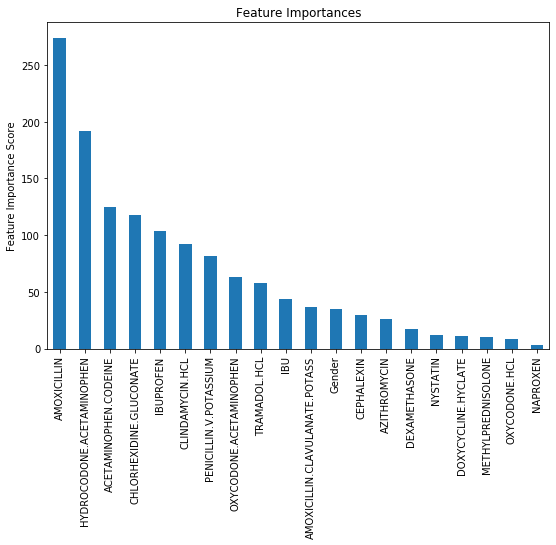

In [27]:
#xgBoost Model
metrics = ['auc', 'map']
xgtrain = xgb.DMatrix(X_train,y_train)#takes in x and y variables
param = alg.get_xgb_params()
cvresult = xgb.cv(param,
                  xgtrain,
                  num_boost_round=alg.get_params()['n_estimators'],
                  nfold=7,
                  metrics=metrics,
                  early_stopping_rounds=50)
alg.set_params(n_estimators=cvresult.shape[0])
#Predict training set:
alg.fit(X_train,y_train,eval_metric=metrics)
xgbooSt = alg.fit(X_train,y_train,eval_metric=metrics)
# Show features, rated by fscore
features = alg._Booster.get_fscore()
feat_imp = pd.Series(features).sort_values(ascending=False)
feat_imp[:50].plot(kind='bar', title='Feature Importances', figsize=(9,6))
plt.ylabel('Feature Importance Score')
# sort for human readability
import operator
sorted_features = sorted(features.items(), key=operator.itemgetter(1))
print('features by importance', sorted_features)

In [19]:
import joblib
joblib.dump(alg , r'P:\data_science\github\Medication_prediction_Data\ModelTest\xgboost_Dentist.pkl')

['P:\\data_science\\github\\Medication_Prediction\\Data\\ModelTest\\xgboost_Dentist.pkl']

In [20]:
trained = joblib.load(r'P:\data_science\github\Medication_prediction_Data\ModelTest\xgboost_Dentist.pkl')

Accuracy : 0.9477
AUC Score (Train): 0.954871


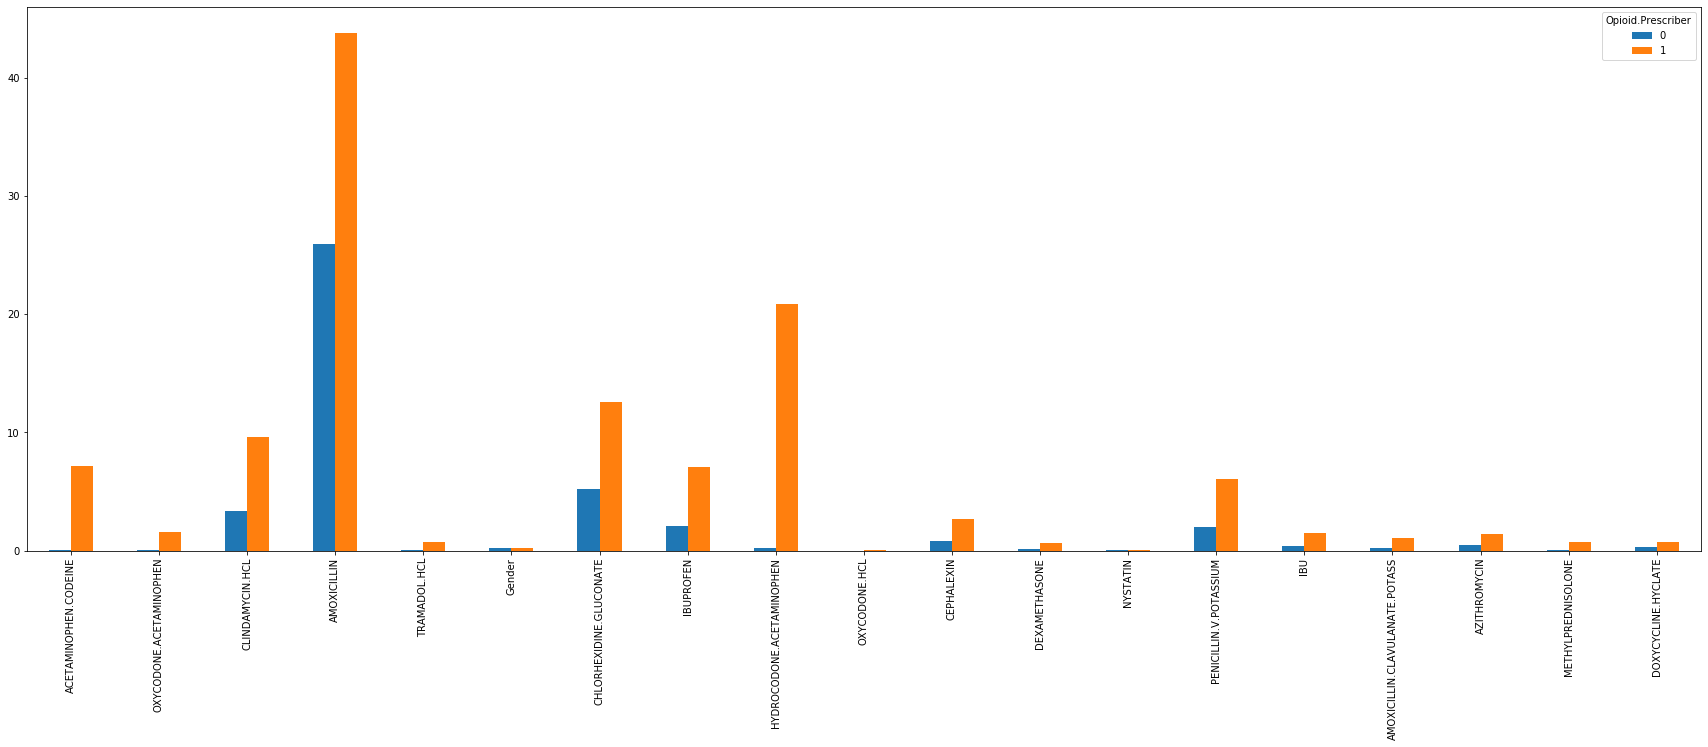

In [24]:
from sklearn import metrics
pred = trained.predict(X_test)
predprob = trained.predict_proba(X_test)[:,1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, pred))
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, predprob))
mean_dentists = dentists.groupby('Opioid.Prescriber').mean()
relevant_stats = [mean_dentists[feature] for feature in features]
pd.DataFrame(relevant_stats).plot(kind="bar", figsize=(30,10))

In [22]:
mean_dentists

,npi,Gender,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,ALENDRONATE.SODIUM,ALLOPURINOL,ALPHAGAN.P,ALPRAZOLAM,AMIODARONE.HCL,...,VENTOLIN.HFA,VERAPAMIL.ER,VESICARE,VICTOZA.3.PAK,VOLTAREN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE
Opioid.Prescriber,,,,,,,,,,,,,,,,,,,,,
0,1.100686e+09,0.255875,0.074344,0.009276,0.00158,0.003916,0.001031,0.002336,0.013811,0.001718,...,0.001443,0.0,0.00000,0.0,0.002542,0.011818,0.006046,0.0,0.001031,0.003848
1,1.100362e+09,0.190799,7.135764,0.001910,0.00000,0.002083,0.000000,0.000000,0.107986,0.000000,...,0.003299,0.0,0.00434,0.0,0.000000,0.011806,0.000000,0.0,0.000000,0.009028
